In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [3]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')

In [4]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
Sky building data:  250
Mud house data:  250


In [5]:
dataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  6


## Dataset Preprocessing using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
WIDTH=224
HEIGHT=224

In [40]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    #shear_range=0.2 ,
                                    #zoom_range=0.2,
                                    #rotation_range=45,
                                    #height_shift_range=0.5,
                                    fill_mode='nearest')
                                     
validation_generator=ImageDataGenerator(rescale=1./255)

train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/train',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical')

validation_dataset = validation_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/test',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 1500 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [9]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [10]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

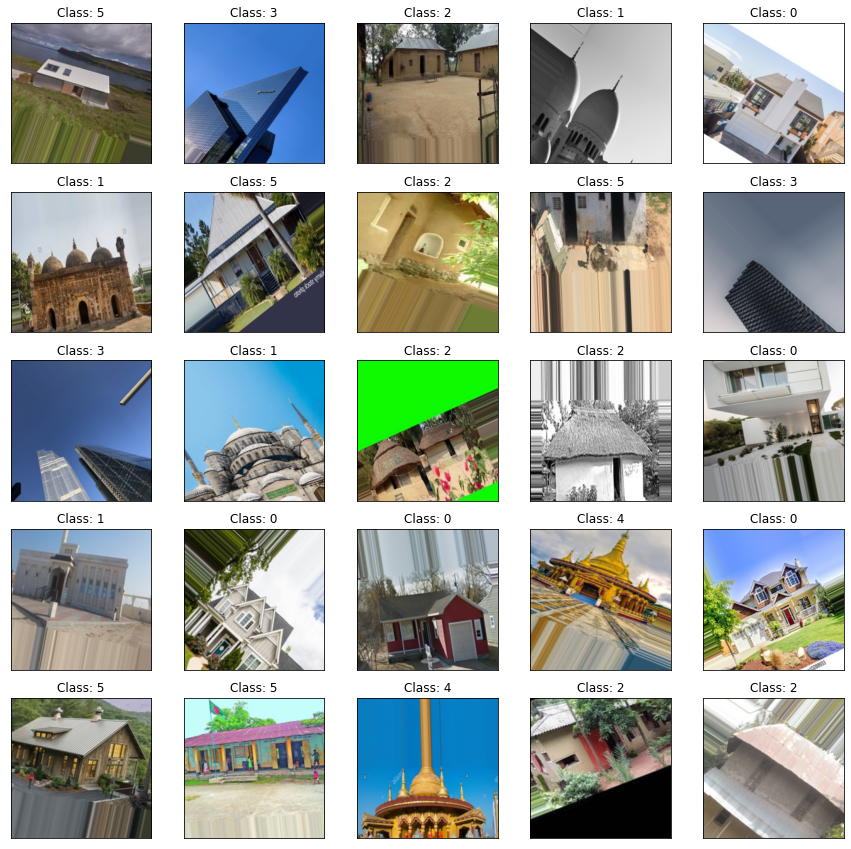

In [12]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title('Class: '+ str(np.argmax(y[i])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

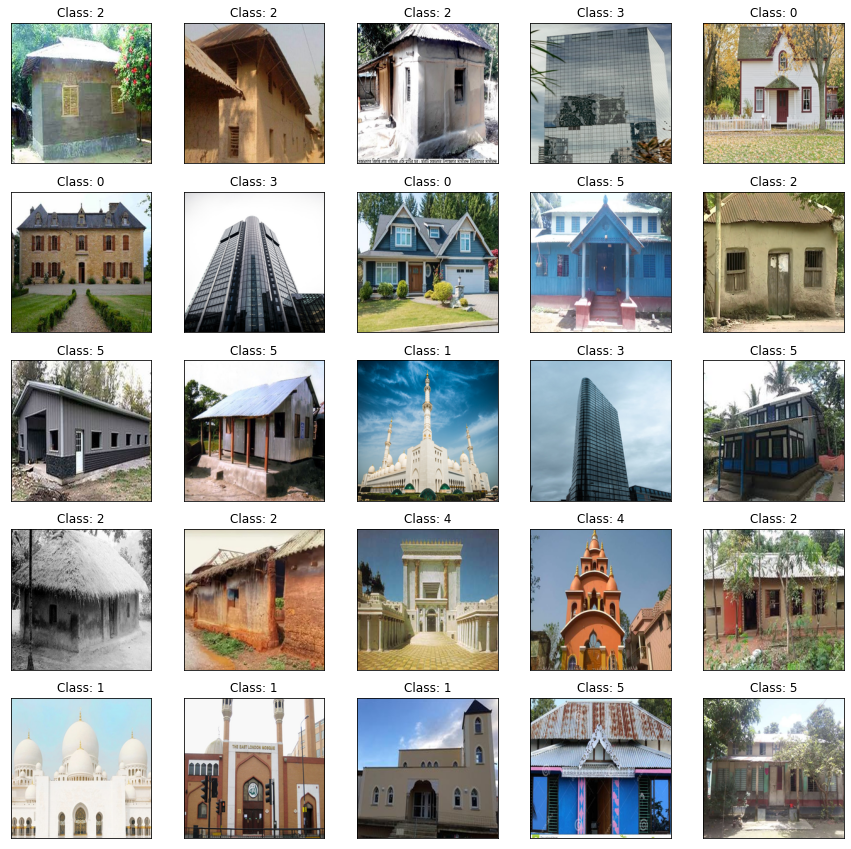

In [13]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title('Class: '+ str(np.argmax(y[i])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Mobile Net v2

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
import tensorflow as tf

In [15]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False)

In [16]:
base_model.trainable = False

In [17]:
total_class

6

In [18]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
#base_model.summary()

## Compile the model

In [20]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [21]:
epochs=10
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

1500
300
46
9


In [22]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
46/46 [==============================] - 67s 1s/step - loss: 1.2356 - accuracy: 0.5068 - val_loss: 0.6342 - val_accuracy: 0.8160
Epoch 2/10
46/46 [==============================] - 58s 1s/step - loss: 0.6146 - accuracy: 0.7820 - val_loss: 0.4012 - val_accuracy: 0.8819
Epoch 3/10
46/46 [==============================] - 59s 1s/step - loss: 0.5117 - accuracy: 0.8215 - val_loss: 0.3440 - val_accuracy: 0.8785
Epoch 4/10
46/46 [==============================] - 57s 1s/step - loss: 0.4481 - accuracy: 0.8440 - val_loss: 0.3358 - val_accuracy: 0.8889
Epoch 5/10
46/46 [==============================] - 58s 1s/step - loss: 0.3803 - accuracy: 0.8726 - val_loss: 0.3115 - val_accuracy: 0.8889
Epoch 6/10
46/46 [==============================] - 59s 1s/step - loss: 0.4054 - accuracy: 0.8508 - val_loss: 0.3063 - val_accuracy: 0.8889
Epoch 7/10
46/46 [==============================] - 59s 1s/step - loss: 0.3988 - accuracy: 0.8604 - val_loss: 0.2884 - val_accuracy: 0.8924
Epoch 8/10
46/46 [==

## Plot Accuracy and Loss Graph

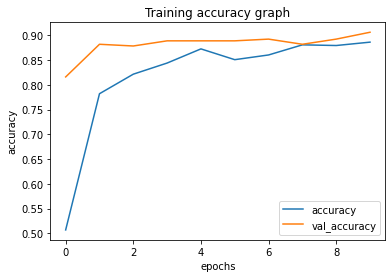

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

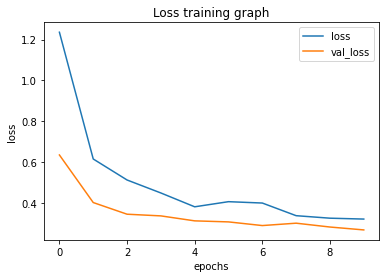

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [25]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 7s 722ms/step - loss: 0.2708 - accuracy: 0.9033
Test Loss:  0.27076438069343567
Test Accuracy:  0.903333306312561


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  90.3333306312561


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

In [27]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[1.7684996e-03 1.9092858e-03 3.5426761e-05 3.1156540e-03 2.3457408e-04
  5.8934093e-04]]
3


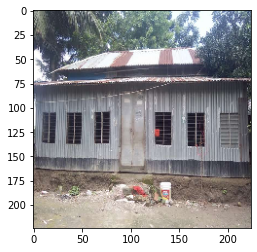

In [28]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.5102496e-03 1.0615915e-02 6.6441906e-05 5.7041645e-03 1.4697611e-03
  1.9477606e-03]]
1


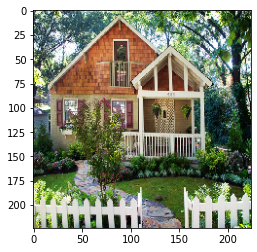

In [29]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.22213769e-03 3.71813774e-03 1.49742355e-05 1.08659863e-02
  1.05375051e-03 7.10099936e-04]]
3


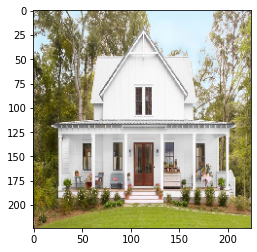

In [30]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.3770461e-03 2.2632778e-03 7.3754109e-06 4.8445463e-03 1.8342137e-03
  3.6522746e-04]]
3


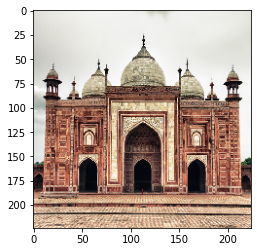

In [31]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [32]:
import time
t = time.time()

export_path_keras = "Saved Model/MobileNet_model_{}.h5".format(int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/MobileNet_model_1617270680.h5


## Reload the model h5 format

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model_path='Saved Model/MobileNet_model_1615629797.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


## Experiment with reload model h5 format

In [35]:
print(len(reload_model.weights))
print(reload_model.output_shape)

262
(None, 4)


## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [36]:
t = time.time()

export_path_sm = "Saved Model/TL MobileNetV2 {}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

Saved Model/TL MobileNetV2 1617270684
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model/TL MobileNetV2 1617270684\assets


## Load SavedModel

In [37]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [38]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(mobilenetv2_1.00_224_input) at 0x2CB0BF17790>

In [39]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x2cb0bd77dc0>